In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pyenchant

     |████████████████████████████████| 61kB 3.8MB/s 


In [ ]:
!apt install -qq enchant

The following additional packages will be installed:
  aspell aspell-en dictionaries-common emacsen-common hunspell-en-us
  libaspell15 libenchant1c2a libhunspell-1.6-0 libtext-iconv-perl
Suggested packages:
  aspell-doc spellutils wordlist hunspell openoffice.org-hunspell
  | openoffice.org-core libenchant-voikko
The following NEW packages will be installed:
  aspell aspell-en dictionaries-common emacsen-common enchant hunspell-en-us
  libaspell15 libenchant1c2a libhunspell-1.6-0 libtext-iconv-perl
0 upgraded, 10 newly installed, 0 to remove and 21 not upgraded.
Need to get 1,310 kB of archives.
After this operation, 5,353 kB of additional disk space will be used.
Preconfiguring packages ...
Selecting previously unselected package libtext-iconv-perl.
(Reading database ... 144611 files and directories currently installed.)
Preparing to unpack .../0-libtext-iconv-perl_1.7-5build6_amd64.deb ...
Unpacking libtext-iconv-perl (1.7-5build6) ...
Selecting previously unselected package libaspe

In [ ]:
import pandas as pd
import numpy as np
import re
import string
import math
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import enchant 
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score

# Handling Imbalanced Data
from imblearn.under_sampling import NearMiss
from collections import Counter

# Visualizing Wordcloud
from wordcloud import WordCloud

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('words')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


# Data Understanding 

In [ ]:
import pandas as pd
#Read the dataFrame
df = pd.read_csv('/content/drive/Shared drives/Data Hackathon Competition /reviews.csv')
df.head()

,Unnamed: 0,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
df.shape

(23486, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing_ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review_Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended_IND          23486 non-null  int64 
 7   Positive_Feedback_Count  23486 non-null  int64 
 8   Division_Name            23472 non-null  object
 9   Department_Name          23472 non-null  object
 10  Class_Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [ ]:
df['Recommended_IND'] = df['Recommended_IND'].replace(0, 'Not Recommended')
df['Recommended_IND'] = df['Recommended_IND'].replace(1, 'Recommended')


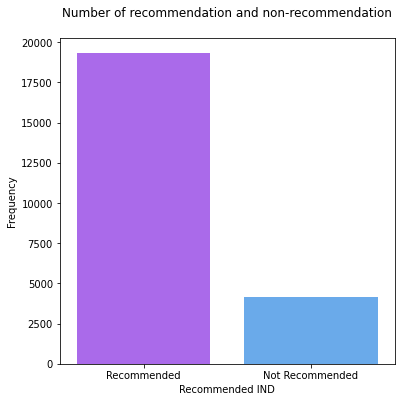

In [ ]:
#display the chart 
# Bar chart
import matplotlib.pyplot as plt
import seaborn as sns
# Print Bar Chart
plt.figure(figsize=(6,6))
sns.countplot(data = df, x = 'Recommended_IND', palette = 'cool_r')
plt.title("Number of recommendation and non-recommendation\n")
plt.ylabel("Frequency")
plt.xlabel("Recommended IND")
#plt.yticks(np.arange(0,190,10))
plt.show()


Recommended        19314
Not Recommended     4172
Name: Recommended_IND, dtype: int64


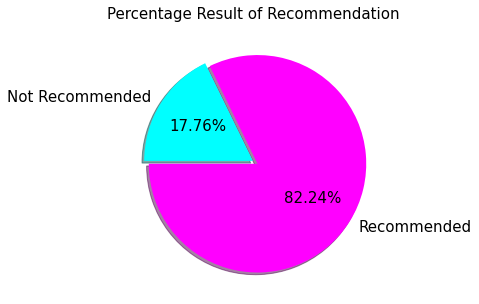

In [ ]:
# Print Pie Chart
Recommended_IND = df.Recommended_IND.value_counts()
print(Recommended_IND)

plt.figure(figsize=(5,5))
Recommended_IND.plot.pie(autopct = '%1.2f%%', shadow = True, explode = (0.05,0), cmap = 'cool_r',startangle = 180, fontsize = 15)
plt.title("Percentage Result of Recommendation",fontsize = 15)
plt.xlabel('')
plt.ylabel('')
plt.show()

In [ ]:
df['Recommended_IND'] = df['Recommended_IND'].replace('Not Recommended',0)
df['Recommended_IND'] = df['Recommended_IND'].replace('Recommended',1)

# Data Preprocessing 

## Remove Unwanted Columns


In [ ]:
# Removing unwanted columns
df = df.loc[:, df.columns.intersection(['Review_Text','Recommended_IND'])]
print(f'Updated Shape of Data: {df.shape}')

Updated Shape of Data: (23486, 2)


In [ ]:
df.reset_index(drop=True, inplace=True)
df.head()

,Review_Text,Recommended_IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


## Handle Missing Value
In the data understanding stage, below shows that there are no missing values in the dataset. Due to no missing values included inside, we no longer need to handle the missing values and replace it.

###Check missing value###


In [ ]:
#check missing value
nullValue = df.isnull().any()
nullValue


Review_Text         True
Recommended_IND    False
dtype: bool

In [ ]:
# Check missing values
df.isnull().sum()

Review_Text        845
Recommended_IND      0
dtype: int64

In [ ]:
# how many total missing values do we have
t_cells = np.product(df.shape) 
t_missing = df.isnull().sum().sum() # total missing value for all the varible
# percent of data that is missing
percent_missing = (t_missing/t_cells) * 100
print("Percentage of missing value: {:.2f}%".format(percent_missing))

Percentage of missing value: 1.80%


In [ ]:
# Drops missing values for all columns
df = df.dropna(how='any')


In [ ]:
# after drop missing value 
df.shape

(22641, 2)

In [ ]:
X = np.array(df.iloc[:, df.columns != 'Recommended_IND'])
y = np.array(df.iloc[:, df.columns == 'Recommended_IND'])

In [ ]:
#double comfirm missing value
nullValue = df.isnull().any()
nullValue

Review_Text        False
Recommended_IND    False
dtype: bool

##Remove Punctuation and Convert to Lower-case

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def text_clean(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    text= text.strip()
    
    return text

cleaned = lambda x: text_clean(x)

In [ ]:
df['New_Review_Text'] = df['Review_Text'].apply(cleaned)
df.head(10)

,Review_Text,Recommended_IND,New_Review_Text
0,Absolutely wonderful - silky and sexy and comf...,1,absolutely wonderful silky and sexy and comfo...
1,Love this dress! it's sooo pretty. i happene...,1,love this dress its sooo pretty i happened t...
2,I had such high hopes for this dress and reall...,0,i had such high hopes for this dress and reall...
3,"I love, love, love this jumpsuit. it's fun, fl...",1,i love love love this jumpsuit its fun flirty ...
4,This shirt is very flattering to all due to th...,1,this shirt is very flattering to all due to th...
5,"I love tracy reese dresses, but this one is no...",0,i love tracy reese dresses but this one is not...
6,I aded this in my basket at hte last mintue to...,1,i aded this in my basket at hte last mintue to...
7,"I ordered this in carbon for store pick up, an...",1,i ordered this in carbon for store pick up and...
8,I love this dress. i usually get an xs but it ...,1,i love this dress i usually get an xs but it r...
9,"I'm 5""5' and 125 lbs. i ordered the s petite t...",1,im and lbs i ordered the s petite to make su...


##Tokenisation

In [ ]:
def tokens(text):
    tokens = nltk.word_tokenize(str(text))
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

cleaned1 = lambda x: tokens(x)

In [ ]:
df['New_Review_Text'] = df['New_Review_Text'].apply(cleaned1)
df.head(10)

,Review_Text,Recommended_IND,New_Review_Text
0,Absolutely wonderful - silky and sexy and comf...,1,"[absolutely, wonderful, silky, and, sexy, and,..."
1,Love this dress! it's sooo pretty. i happene...,1,"[love, this, dress, its, sooo, pretty, i, happ..."
2,I had such high hopes for this dress and reall...,0,"[i, had, such, high, hopes, for, this, dress, ..."
3,"I love, love, love this jumpsuit. it's fun, fl...",1,"[i, love, love, love, this, jumpsuit, its, fun..."
4,This shirt is very flattering to all due to th...,1,"[this, shirt, is, very, flattering, to, all, d..."
5,"I love tracy reese dresses, but this one is no...",0,"[i, love, tracy, reese, dresses, but, this, on..."
6,I aded this in my basket at hte last mintue to...,1,"[i, aded, this, in, my, basket, at, hte, last,..."
7,"I ordered this in carbon for store pick up, an...",1,"[i, ordered, this, in, carbon, for, store, pic..."
8,I love this dress. i usually get an xs but it ...,1,"[i, love, this, dress, i, usually, get, an, xs..."
9,"I'm 5""5' and 125 lbs. i ordered the s petite t...",1,"[im, and, lbs, i, ordered, the, s, petite, to,..."


##Remove Stopwords

In [ ]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
  remove = [w for w in text if w not in stop_words]
  return remove

cleaned2 = lambda x: remove_stopwords(x)

In [ ]:
df['New_Review_Text'] = df['New_Review_Text'].apply(cleaned2)
df.head(10)

,Review_Text,Recommended_IND,New_Review_Text
0,Absolutely wonderful - silky and sexy and comf...,1,"[absolutely, wonderful, silky, sexy, comfortable]"
1,Love this dress! it's sooo pretty. i happene...,1,"[love, dress, sooo, pretty, happened, find, st..."
2,I had such high hopes for this dress and reall...,0,"[high, hopes, dress, really, wanted, work, ini..."
3,"I love, love, love this jumpsuit. it's fun, fl...",1,"[love, love, love, jumpsuit, fun, flirty, fabu..."
4,This shirt is very flattering to all due to th...,1,"[shirt, flattering, due, adjustable, front, ti..."
5,"I love tracy reese dresses, but this one is no...",0,"[love, tracy, reese, dresses, one, petite, fee..."
6,I aded this in my basket at hte last mintue to...,1,"[aded, basket, hte, last, mintue, see, would, ..."
7,"I ordered this in carbon for store pick up, an...",1,"[ordered, carbon, store, pick, ton, stuff, alw..."
8,I love this dress. i usually get an xs but it ...,1,"[love, dress, usually, get, xs, runs, little, ..."
9,"I'm 5""5' and 125 lbs. i ordered the s petite t...",1,"[im, lbs, ordered, petite, make, sure, length,..."


##Lemmetisation

In [ ]:
# Lemmatize the verb
def lem1(text):
    wordnet = WordNetLemmatizer()
    lemma_words = []
    for w in text:
      lemma_words.append(wordnet.lemmatize(w,'v'))

    return lemma_words
    
cleaned3 = lambda x: lem1(x)

In [ ]:
df['New_Review_Text'] = df['New_Review_Text'].apply(cleaned3)
df.head(10)

,Review_Text,Recommended_IND,New_Review_Text
0,Absolutely wonderful - silky and sexy and comf...,1,"[absolutely, wonderful, silky, sexy, comfortable]"
1,Love this dress! it's sooo pretty. i happene...,1,"[love, dress, sooo, pretty, happen, find, stor..."
2,I had such high hopes for this dress and reall...,0,"[high, hop, dress, really, want, work, initial..."
3,"I love, love, love this jumpsuit. it's fun, fl...",1,"[love, love, love, jumpsuit, fun, flirty, fabu..."
4,This shirt is very flattering to all due to th...,1,"[shirt, flatter, due, adjustable, front, tie, ..."
5,"I love tracy reese dresses, but this one is no...",0,"[love, tracy, reese, dress, one, petite, feet,..."
6,I aded this in my basket at hte last mintue to...,1,"[aded, basket, hte, last, mintue, see, would, ..."
7,"I ordered this in carbon for store pick up, an...",1,"[order, carbon, store, pick, ton, stuff, alway..."
8,I love this dress. i usually get an xs but it ...,1,"[love, dress, usually, get, xs, run, little, s..."
9,"I'm 5""5' and 125 lbs. i ordered the s petite t...",1,"[im, lbs, order, petite, make, sure, length, w..."


In [ ]:
# Lemmatize the nouns
def lem2(text):
    wordnet = WordNetLemmatizer()
    lemma_words = []
    for w in text:
      lemma_words.append(wordnet.lemmatize(w,'n'))

    return lemma_words
    
cleaned4 = lambda x: lem2(x)

In [ ]:
df['New_Review_Text'] = df['New_Review_Text'].apply(cleaned4)
df.head(10)

,Review_Text,Recommended_IND,New_Review_Text
0,Absolutely wonderful - silky and sexy and comf...,1,"[absolutely, wonderful, silky, sexy, comfortable]"
1,Love this dress! it's sooo pretty. i happene...,1,"[love, dress, sooo, pretty, happen, find, stor..."
2,I had such high hopes for this dress and reall...,0,"[high, hop, dress, really, want, work, initial..."
3,"I love, love, love this jumpsuit. it's fun, fl...",1,"[love, love, love, jumpsuit, fun, flirty, fabu..."
4,This shirt is very flattering to all due to th...,1,"[shirt, flatter, due, adjustable, front, tie, ..."
5,"I love tracy reese dresses, but this one is no...",0,"[love, tracy, reese, dress, one, petite, foot,..."
6,I aded this in my basket at hte last mintue to...,1,"[aded, basket, hte, last, mintue, see, would, ..."
7,"I ordered this in carbon for store pick up, an...",1,"[order, carbon, store, pick, ton, stuff, alway..."
8,I love this dress. i usually get an xs but it ...,1,"[love, dress, usually, get, x, run, little, sn..."
9,"I'm 5""5' and 125 lbs. i ordered the s petite t...",1,"[im, lb, order, petite, make, sure, length, wa..."


##Remove Non-English Words

In [ ]:
dictionary = enchant.Dict("en_US")

def remove_non_english(text):
  remove = []
  for w in text:
    if dictionary.check(w):
      remove.append(w)
    
  return remove

cleaned5 = lambda x: remove_non_english(x)

In [ ]:
df['New_Review_Text'] = df['New_Review_Text'].apply(cleaned5)
df.head(10)

,Review_Text,Recommended_IND,New_Review_Text
0,Absolutely wonderful - silky and sexy and comf...,1,"[absolutely, wonderful, silky, sexy, comfortable]"
1,Love this dress! it's sooo pretty. i happene...,1,"[love, dress, pretty, happen, find, store, gla..."
2,I had such high hopes for this dress and reall...,0,"[high, hop, dress, really, want, work, initial..."
3,"I love, love, love this jumpsuit. it's fun, fl...",1,"[love, love, love, jumpsuit, fun, flirty, fabu..."
4,This shirt is very flattering to all due to th...,1,"[shirt, flatter, due, adjustable, front, tie, ..."
5,"I love tracy reese dresses, but this one is no...",0,"[love, dress, one, petite, foot, tall, usually..."
6,I aded this in my basket at hte last mintue to...,1,"[basket, last, see, would, look, like, person,..."
7,"I ordered this in carbon for store pick up, an...",1,"[order, carbon, store, pick, ton, stuff, alway..."
8,I love this dress. i usually get an xs but it ...,1,"[love, dress, usually, get, x, run, little, sn..."
9,"I'm 5""5' and 125 lbs. i ordered the s petite t...",1,"[lb, order, petite, make, sure, length, long, ..."


In [ ]:
df.shape

(22641, 3)

#Sentiment Analysis

##Wordcloud Visualising

In [ ]:
not_recommended = df[df['Recommended_IND'] == 0]
not_recommended = not_recommended['New_Review_Text']
recommended = df[df['Recommended_IND'] == 1]
recommended = recommended['New_Review_Text']

In [ ]:
df.shape

(22641, 3)

In [ ]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(str(data))
    
    wordcloud = WordCloud(background_color=color,
                          width=2500,
                          height=2500
                          ).generate(str(data))
    plt.figure(1,figsize=(50, 10))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

Positive words


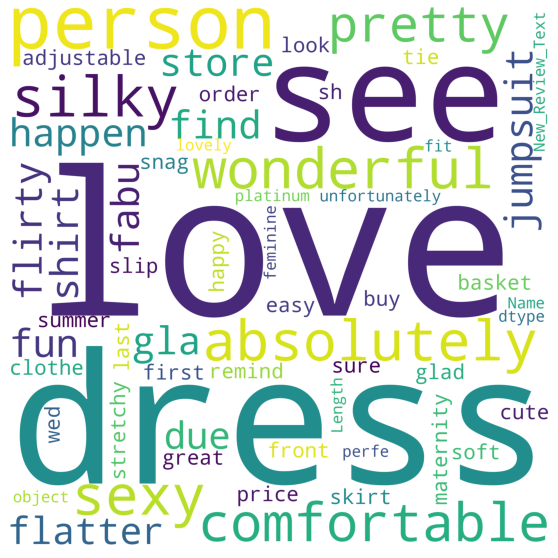

Negative words


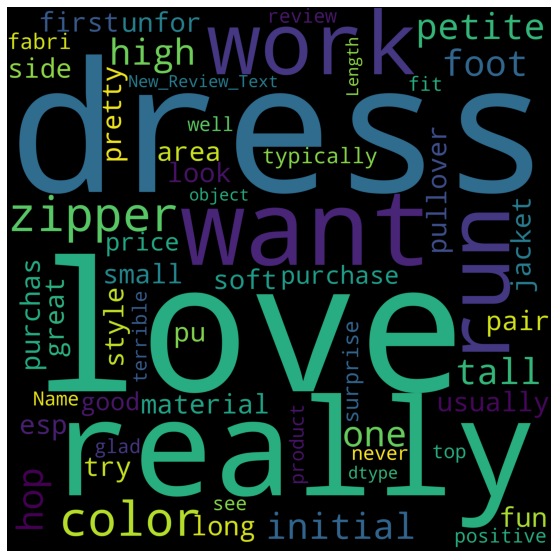

In [ ]:
print("Positive words")
wordcloud_draw(recommended,'white')
print("Negative words")
wordcloud_draw(not_recommended)

In [ ]:
df.shape

(22641, 3)

In [ ]:
pos_df = df[df.Recommended_IND== 1]
neg_df = df[df.Recommended_IND== 0]
pos_df.head(3)

,Review_Text,Recommended_IND,New_Review_Text
0,Absolutely wonderful - silky and sexy and comf...,1,"[absolutely, wonderful, silky, sexy, comfortable]"
1,Love this dress! it's sooo pretty. i happene...,1,"[love, dress, pretty, happen, find, store, gla..."
3,"I love, love, love this jumpsuit. it's fun, fl...",1,"[love, love, love, jumpsuit, fun, flirty, fabu..."


In [ ]:
pos_words =[]
neg_words = []

for review in pos_df.New_Review_Text:
    pos_words.append(review) 
pos_words = ' '.join([str(i) for i in pos_words])
pos_words[:40]

for review in neg_df.New_Review_Text:
    neg_words.append(review)
neg_words = ' '.join([str(i) for i in neg_words])
neg_words[:400]

"['high', 'hop', 'dress', 'really', 'want', 'work', 'initially', 'order', 'petite', 'small', 'usual', 'size', 'find', 'outrageously', 'small', 'small', 'fact', 'could', 'zip', 'reorder', 'petite', 'medium', 'overall', 'top', 'half', 'comfortable', 'fit', 'nicely', 'bottom', 'half', 'tight', 'layer', 'several', 'somewhat', 'cheap', 'net', 'layer', 'major', 'design', 'flaw', 'net', 'layer', 'sew', 'd"

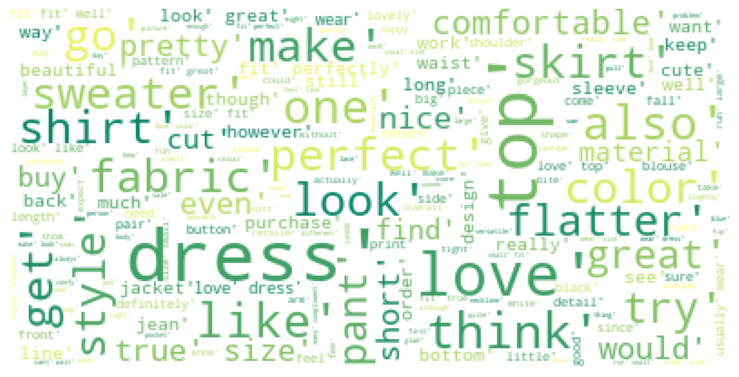

In [ ]:
wordcloud = WordCloud().generate(pos_words)

wordcloud = WordCloud(background_color="white",max_words=len(pos_words),\
                      max_font_size=40, relative_scaling=.5, colormap='summer').generate(pos_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

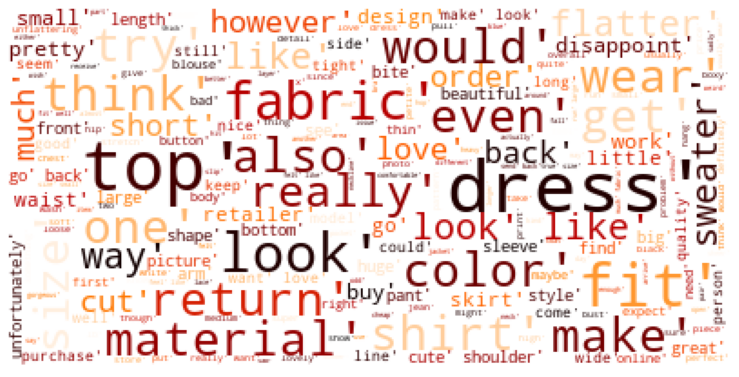

In [ ]:
wordcloud = WordCloud().generate(neg_words)

wordcloud = WordCloud(background_color="white",max_words=len(neg_words),\
                      max_font_size=40, relative_scaling=.5, colormap='gist_heat').generate(neg_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

##Feature Generation using Bag-of-words

In [ ]:
def norm_docs(text):
  text = ' '.join(text)
  return text

norm_docs = np.vectorize(norm_docs) 
normalized_documents = norm_docs(df['New_Review_Text'])

count_vectorizer = CountVectorizer()

bag_of_words = count_vectorizer.fit_transform(normalized_documents)
feature_names = count_vectorizer.get_feature_names()
pd.DataFrame(bag_of_words.toarray(), columns = feature_names)

,ab,abbey,abdomen,abdominal,abhor,ability,abject,able,abnormal,abnormally,abroad,abruptly,absence,absolute,absolutely,absorbent,abstract,absurd,absurdly,abundance,abundant,abuse,abut,ac,acacia,accent,accentuate,accept,acceptable,acceptably,access,accessorize,accessorized,accessorizes,accessorizing,accessory,accident,accidental,accidentally,accommodate,...,year,yell,yellow,yellower,yellowish,yellowy,yep,yes,yest,yesterday,yesteryear,yet,yield,yikes,yippee,yo,yoga,yogi,yoke,yolk,young,younger,youth,youthful,yr,yuck,yucky,yuk,yummiest,yummy,yup,zed,zero,zigzag,zillion,zip,zipper,zombie,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22636,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22637,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22638,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22639,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(count_vectorizer.vocabulary_)

{'absolutely': 14, 'wonderful': 6856, 'silky': 5428, 'sexy': 5302, 'comfortable': 1152, 'love': 3504, 'dress': 1809, 'pretty': 4587, 'happen': 2742, 'find': 2249, 'store': 5792, 'glad': 2563, 'never': 3944, 'would': 6885, 'order': 4120, 'online': 4088, 'petite': 4363, 'buy': 797, 'length': 3392, 'hit': 2844, 'little': 3460, 'knee': 3285, 'definitely': 1552, 'true': 6325, 'midi': 3707, 'someone': 5603, 'truly': 6327, 'high': 2822, 'hop': 2880, 'really': 4791, 'want': 6681, 'work': 6866, 'initially': 3077, 'small': 5535, 'usual': 6567, 'size': 5465, 'outrageously': 4155, 'fact': 2129, 'could': 1332, 'zip': 6948, 'reorder': 4926, 'medium': 3664, 'overall': 4166, 'top': 6235, 'half': 2713, 'fit': 2271, 'nicely': 3955, 'bottom': 656, 'tight': 6185, 'layer': 3358, 'several': 5294, 'somewhat': 5609, 'cheap': 945, 'net': 3941, 'major': 3565, 'design': 1605, 'flaw': 2304, 'sew': 5297, 'directly': 1675, 'zipper': 6949, 'jumpsuit': 3242, 'fun': 2462, 'flirty': 2323, 'fabulous': 2126, 'every': 202

In [ ]:
df.shape

(22641, 3)

## Train test split

In [ ]:
X = bag_of_words
y = df['Recommended_IND']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print("Training Shape: ",X_train.shape)
print("Testing Shape: ",X_test.shape)

Training Shape:  (18112, 6953)
Testing Shape:  (4529, 6953)


## SMOTE 
As our dataset is imbalance, so we need to use SMOTE to handle the imbalance dataset before modelling it.

###Use SMOTE to balance the number of occurence of a label###

In [ ]:
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Shape of X: (22641, 6953)
Shape of y: (22641,)
Number transactions X_train dataset:  (18112, 6953)
Number transactions y_train dataset:  (18112,)
Number transactions X_test dataset:  (4529, 6953)
Number transactions y_test dataset:  (4529,)


In [ ]:
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=0)
X_train, y_train = sm.fit_sample(X_train, y_train.ravel())

#confirm the data has been balanced
print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 14823
Before OverSampling, counts of label '0': 3289 



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (29646, 6953)
After OverSampling, the shape of train_y: (29646,) 

After OverSampling, counts of label '1': 14823
After OverSampling, counts of label '0': 14823


# Modelling 

##Random Forest

In [ ]:
# Import the model
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 100)

# Train the model on training data
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

['Yes' 'Yes' 'Yes' ... 'No' 'No' 'No']


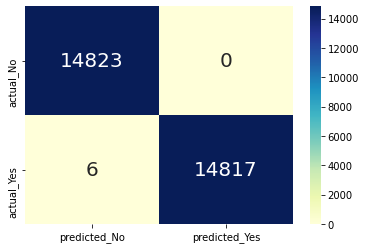

In [ ]:
#Take the model that was trained on the X_train data and apply it to the X_test
pred_rf_train = rf.predict(X_train)

options = {0: "No", 1: "Yes"} 
print(np.array([options[x] for x in pred_rf_train]))

#display confusion matrix for trainset
rf_cm_train = confusion_matrix(y_train,pred_rf_train)
sns.heatmap(rf_cm_train,xticklabels=['predicted_No', 'predicted_Yes'], yticklabels=['actual_No','actual_Yes'],
           annot=True, fmt='d', annot_kws={'fontsize':20},cmap="YlGnBu");
true_neg, false_pos = rf_cm_train[0]
true_pos, false_neg = rf_cm_train[1] 

['Yes' 'Yes' 'No' ... 'No' 'Yes' 'Yes']
            Trainset     Testset
Accuracy:   0.9997976118194697 	 0.8319717376904394
Recall:     0.9995952236389395 	 0.9357008340059187
Precision:  1.0 		 0.8695
F1 score:   0.9997975708502024 	 0.9013865491771414


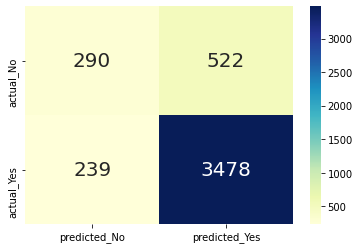

In [ ]:
#Take the model that was trained on the X_train data and apply it to the X_test
pred_rf = rf.predict(X_test)

options = {0: "No", 1: "Yes"} 
print(np.array([options[x] for x in pred_rf]))

#display confusion matrix 
rf_cm = confusion_matrix(y_test,pred_rf)
sns.heatmap(rf_cm,xticklabels=['predicted_No', 'predicted_Yes'], yticklabels=['actual_No','actual_Yes'],
           annot=True, fmt='d', annot_kws={'fontsize':20},cmap="YlGnBu");
true_neg, false_pos = rf_cm[0]
true_pos, false_neg = rf_cm[1] 

#print the accuracy score, recall, precision and F1 score 
print("            Trainset     Testset")
print("Accuracy:  ",accuracy_score(y_train,pred_rf_train),"\t",accuracy_score(y_test,pred_rf))
print("Recall:    ",recall_score(y_train,pred_rf_train),"\t",recall_score(y_test,pred_rf))
print("Precision: ",precision_score(y_train,pred_rf_train),"\t\t",precision_score(y_test,pred_rf))
print("F1 score:  ",f1_score(y_train,pred_rf_train),"\t",f1_score(y_test,pred_rf))

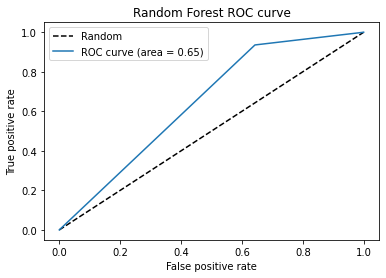

In [ ]:
from sklearn.metrics import roc_curve , auc

fpr, tpr, _ = roc_curve(y_test, pred_rf)
roc_auc = auc(fpr,tpr)

#Now Draw ROC using fpr , tpr
plt.plot([0, 1], [0, 1], 'k--',label = 'Random')
plt.plot(fpr,tpr,label ='ROC curve (area = %0.2f)' %roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest ROC curve')
plt.legend(loc ='best')

##Decision Tree

['Yes' 'Yes' 'Yes' ... 'No' 'No' 'No']


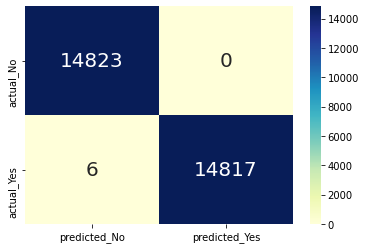

In [ ]:
#import decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
#train using the algorithm
dt.fit(X_train,y_train)
pred_dt_train = dt.predict(X_train)

options = {0: "No", 1: "Yes"} 
print(np.array([options[x] for x in pred_dt_train]))

#display confusion matrix for trainset
dt_cm_train = confusion_matrix(y_train,pred_dt_train)
sns.heatmap(dt_cm_train,xticklabels=['predicted_No', 'predicted_Yes'], yticklabels=['actual_No','actual_Yes'],
           annot=True, fmt='d', annot_kws={'fontsize':20},cmap="YlGnBu");
true_neg, false_pos = dt_cm_train[0]
true_pos, false_neg = dt_cm_train[1]

['Yes' 'No' 'No' ... 'No' 'Yes' 'Yes']
            Trainset             Testset
Accuracy:   0.9997976118194697 	 0.7701479355266063
Recall:     0.9995952236389395 	 0.8364272262577347
Precision:  1.0 	 0.8777526821005082
F1 score:   0.9997975708502024 	 0.8565918170546907


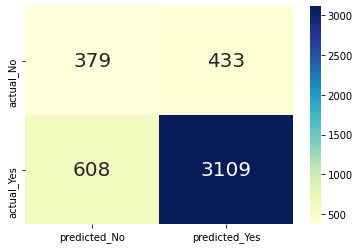

In [ ]:
#use trainset to do prediction on testset
pred_dt = dt.predict(X_test)

options = {0: "No", 1: "Yes"} 
print(np.array([options[x] for x in pred_dt]))

#display confusion matrix for testset
dt_cm=confusion_matrix(y_test,pred_dt)
sns.heatmap(dt_cm,xticklabels=['predicted_No', 'predicted_Yes'], yticklabels=['actual_No','actual_Yes'],
           annot=True, fmt='d', annot_kws={'fontsize':20},cmap="YlGnBu");
true_neg, false_pos = dt_cm[0]
true_pos, false_neg = dt_cm[1]

#print the accuracy score, recall, precision and F1 score 
print("            Trainset             Testset")
print("Accuracy:  ",accuracy_score(y_train,pred_dt_train),"\t",accuracy_score(y_test,pred_dt))
print("Recall:    ",recall_score(y_train,pred_dt_train),"\t",recall_score(y_test,pred_dt))
print("Precision: ",precision_score(y_train,pred_dt_train),"\t",precision_score(y_test,pred_dt))
print("F1 score:  ",f1_score(y_train,pred_dt_train),"\t",f1_score(y_test,pred_dt))

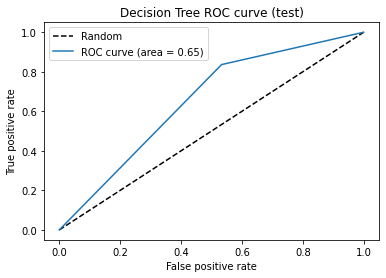

In [ ]:
from sklearn.metrics import roc_curve , auc

fpr, tpr, _ = roc_curve(y_test, pred_dt)
roc_auc = auc(fpr,tpr)

#Now Draw ROC using fpr , tpr
plt.plot([0, 1], [0, 1], 'k--',label = 'Random')
plt.plot(fpr,tpr,label ='ROC curve (area = %0.2f)' %roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree ROC curve (test)')
plt.legend(loc ='best')

##SVM(Support Vector Machine)

['Yes' 'Yes' 'Yes' ... 'No' 'No' 'No']


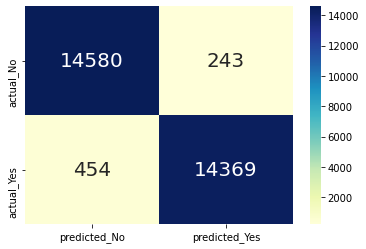

In [ ]:
from sklearn.svm import SVC
svc = SVC()
#train using the algorithm
svc.fit(X_train,y_train)
pred_svc_train = svc.predict(X_train)

options = {0: "No", 1: "Yes"} 
print(np.array([options[x] for x in pred_svc_train]))

#display confusion matrix for trainset
svc_cm_train = confusion_matrix(y_train,pred_svc_train)
sns.heatmap(svc_cm_train,xticklabels=['predicted_No', 'predicted_Yes'], yticklabels=['actual_No','actual_Yes'],
           annot=True, fmt='d', annot_kws={'fontsize':20},cmap="YlGnBu");
true_neg, false_pos = svc_cm_train[0]
true_pos, false_neg = svc_cm_train[1]

['Yes' 'Yes' 'No' ... 'No' 'Yes' 'Yes']
            Trainset             Testset
Accuracy:   0.9764892396950685 	 0.8664164274674321
Recall:     0.9693719220130878 	 0.9383911756793113
Precision:  0.9833698330139611 	 0.9026915113871635
F1 score:   0.9763207066417529 	 0.9201952249043661


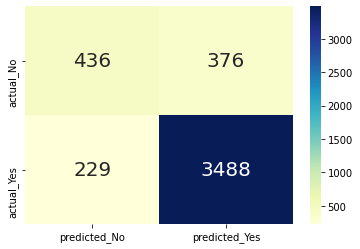

In [ ]:
#use trainset to do prediction on testset
pred_svc = svc.predict(X_test)

options = {0: "No", 1: "Yes"} 
print(np.array([options[x] for x in pred_svc]))

#display confusion matrix for testset
svc_cm=confusion_matrix(y_test,pred_svc)
sns.heatmap(svc_cm,xticklabels=['predicted_No', 'predicted_Yes'], yticklabels=['actual_No','actual_Yes'],
           annot=True, fmt='d', annot_kws={'fontsize':20},cmap="YlGnBu");
true_neg, false_pos = svc_cm[0]
true_pos, false_neg = svc_cm[1]

#print the accuracy score, recall, precision and F1 score 
print("            Trainset             Testset")
print("Accuracy:  ",accuracy_score(y_train,pred_svc_train),"\t",accuracy_score(y_test,pred_svc))
print("Recall:    ",recall_score(y_train,pred_svc_train),"\t",recall_score(y_test,pred_svc))
print("Precision: ",precision_score(y_train,pred_svc_train),"\t",precision_score(y_test,pred_svc))
print("F1 score:  ",f1_score(y_train,pred_svc_train),"\t",f1_score(y_test,pred_svc))

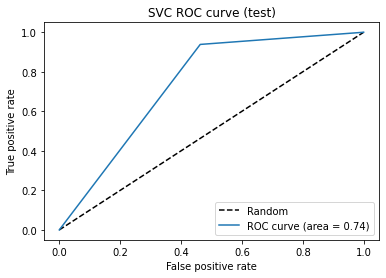

In [ ]:
from sklearn.metrics import roc_curve , auc

fpr, tpr, _ = roc_curve(y_test, pred_svc)
roc_auc = auc(fpr,tpr)

#Now Draw ROC using fpr , tpr
plt.plot([0, 1], [0, 1], 'k--',label = 'Random')
plt.plot(fpr,tpr,label ='ROC curve (area = %0.2f)' %roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('SVC ROC curve (test)')
plt.legend(loc ='best')

##Naive bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

nb.fit(X_train, y_train)

nb.score(X_train, y_train)

0.8891924711596843

In [ ]:
nb.score(X_test, y_test)

0.862883638772356

In [ ]:
nb_acc_test = (nb.score(X_test, y_test)) * 100
nb_acc_train = (nb.score(X_train, y_train)) * 100


print('NB accuracy for test set: {:.2f}%'.format(nb_acc_test))
print('NB accuracy for traning set: {:.2f}%'.format(nb_acc_train))
from sklearn import metrics
nb_cm = confusion_matrix(y_test,nb.predict(X_test))
nb_cm

NB accuracy for test set: 86.29%
NB accuracy for traning set: 88.92%


array([[ 622,  190],
       [ 431, 3286]])

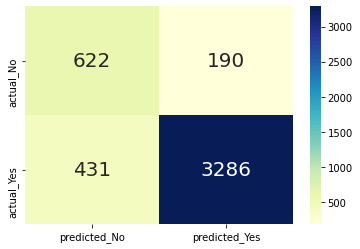

In [ ]:
#display confusion matrix for testset
nb_cm=confusion_matrix(y_test,nb.predict(X_test))
sns.heatmap(nb_cm,xticklabels=['predicted_No', 'predicted_Yes'], yticklabels=['actual_No','actual_Yes'],
           annot=True, fmt='d', annot_kws={'fontsize':20},cmap="YlGnBu");
true_neg, false_pos = nb_cm[0]
true_pos, false_neg = nb_cm[1]

In [ ]:
from sklearn.metrics import classification_report

y_true_nb, y_pred_nb = y_test, nb.predict(X_test)
print(classification_report(y_true_nb, y_pred_nb))

nb_pre = precision_score(y_true_nb, y_pred_nb) * 100 
nb_rec = recall_score(y_true_nb, y_pred_nb)* 100 
nb_f1 = f1_score(y_true_nb, y_pred_nb)* 100 

              precision    recall  f1-score   support

           0       0.59      0.77      0.67       812
           1       0.95      0.88      0.91      3717

    accuracy                           0.86      4529
   macro avg       0.77      0.83      0.79      4529
weighted avg       0.88      0.86      0.87      4529



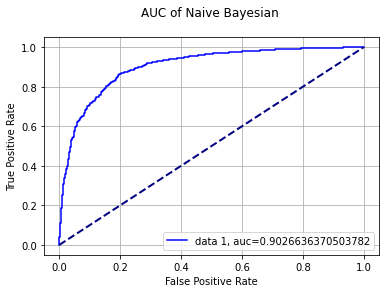

In [ ]:
y_pred_proba = nb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
nb_auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(nb_auc),color='blue')

lw = 2
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.legend(loc=4)
plt.title("AUC of Naive Bayesian \n")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.grid(True)
plt.show()

##Evaluation

In [ ]:
#gives model report in dataframe
def model_report(testing_y,pred,name) :
    accuracy     = accuracy_score(testing_y,pred)
    recallscore  = recall_score(testing_y,pred)
    precision    = precision_score(testing_y,pred)
    f1score      = f1_score(testing_y,pred) 
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                      })
    return df

#outputs for every model
model_rf = model_report(y_test,pred_rf,"Random Forest")
model_dt = model_report(y_test,pred_dt,"Decision Tree")
model_svc = model_report(y_test,pred_svc,"SVM")
model_gnb = model_report(y_test,nb.predict(X_test),"Naive Bayes")

model_performances = pd.concat([model_rf,model_dt,model_svc,model_gnb],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)
model_performances

,Model,Accuracy_score,Recall_score,Precision,f1_score
0,Random Forest,0.831972,0.935701,0.869500,0.901387
1,Decision Tree,0.770148,0.836427,0.877753,0.856592
2,SVM,0.866416,0.938391,0.902692,0.920195
3,Naive Bayes,0.862884,0.884046,0.945339,0.913666


#Test Customer's Input

In [ ]:
#Input Review
print('Test a custom review message')
print('Enter review to be analysed: ', end=" ")
test = []
test.append(input())
test_dtm = count_vectorizer.transform(test)
predLabel = nb.predict(test_dtm)
tags = ['Negative','Positive']

# Display Output
print('The review is predicted',tags[predLabel[0]])

Test a custom review message
Enter review to be analysed:  there is a hole
The review is predicted Negative
